# Student Alcohol Consumption

Improt all the libraries

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade. I will use the students math data to doing this assignment.

In [3]:
df1 = pd.read_csv('student-mat.csv')

In [4]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df2 = pd.read_csv('student-por.csv')
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Combine two dataframes.

In [8]:
df = df1.merge(df2,on=("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob",
                       "reason","guardian","traveltime","studytime","failures","schoolsup",
                       "famsup","paid","activities","nursery","higher","internet","romantic",
                      "famrel","freetime","goout","Dalc","Walc","health","absences"))
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11,13,12,13
1,GP,M,15,U,GT3,A,2,2,other,other,...,1,1,3,0,14,16,16,14,14,15
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,1,0,13,14,15,12,13,14
3,GP,M,15,U,GT3,T,4,4,health,health,...,1,1,5,0,12,15,15,11,12,12
4,GP,M,15,U,GT3,T,4,4,health,services,...,3,4,5,0,9,11,12,10,11,11


In [36]:
df = pd.get_dummies(df)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,16,2,2,1,2,0,4,4,4,1,...,0,1,0,0,1,1,0,1,1,0
1,15,2,2,1,3,0,4,5,2,1,...,0,1,0,0,1,1,0,1,0,1
2,15,4,3,1,2,0,4,4,1,1,...,0,1,0,0,1,1,0,1,1,0
3,15,4,4,1,1,0,5,4,2,1,...,1,1,0,0,1,1,0,1,1,0
4,15,4,4,1,2,0,5,4,2,3,...,1,1,0,1,0,1,0,1,1,0


# Prediction of Secondary School Students’ Alcohol Addiction using Random Forest

Teenage alcohol addiction poses a major problem to the wellbeing of the individual as well as the society. Prevention of this requires identifying the factors causing this addiction. The existing systems mainly rely on decision trees and are able to isolate the factors causing the addiction. The proposed system will be able to predict whether a student with a set of conditions will get addicted to alcohol or not with high accuracy and thereby verify the extent to which the isolated factors are correct. 

The data consists of many variables, which are described in Kaggle. Each dataframe has 33 variables. After I merge the two dataframes, there are a total of 36 variables. We can use them all. We are predicting Workday alcohol consumption: from 1-very low to 5-very high). Let us look at the different levels of alcohol consumption.

In [37]:
df['Dalc'].value_counts()

1    29
2     7
3     3
Name: Dalc, dtype: int64

The data consists of many variables, which are described in Kaggle. Each dataframe has 33 variables. After I merge the two dataframes, there are a total of 36 variables. We can use them all. We are forecasting Weekend alcohol consumption (numeric: from 1-very low to 5-very high). Let us look at the different levels of alcohol consumption.

In [38]:
df['Walc'].value_counts()

1    21
3     6
4     5
2     4
5     3
Name: Walc, dtype: int64

Get our X and y and split the data.

In [44]:
X = df.drop(['G1_x','G2_x','G3_x','G1_y','G2_y','G3_y'], axis = 1)
y1 = df['Dalc']
y2 = df["Walc"]

## Y1: Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

### Training the algorithm for Workday alcohol consumption

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 1)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [58]:
rf.score(X_test,y_test)

0.8333333333333334

### Evaluating the model

In [59]:
rf.classes_

array([1, 2, 3], dtype=int64)

In [61]:
y_pred = rf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
cm = pd.DataFrame(cm, index=['1', '2',"3"], columns = ['very low', 'low',"medium"])
cm

,very low,low,medium
1,10,0,0
2,1,0,0
3,0,1,0


I am going to do the easy way to calculate some numbers by classificattion_report.

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.30      0.33      0.32        12
weighted avg       0.76      0.83      0.79        12



C:\Users\huhon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision for working day alchole consumption is  good (0.91): students only have very low alchole consumption during the working days.


### Different parameters

We can change the number of trees and the number of variables considered at each branch of the tree. By default, n_estimators is set to 10, and max_features is set to the square root of a numeric variable. Change the two completely by using a tree with all the variables, and then see what happens.

In [91]:
rf_new  = RandomForestClassifier(n_estimators = 10, max_features = 50, random_state=1)
rf_new = rf_new.fit(X_train, y_train)
y_pred_new = rf_new.predict(X_test) 
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.67        12
   macro avg       0.27      0.40      0.30        12
weighted avg       0.61      0.67      0.62        12



C:\Users\huhon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Making use of probabilities

In order to improve the recall rate at the cost of accuracy, I will use predict_proba to get the probability.

In [92]:
y_pred_prob = rf.predict_proba(X_test) 
y_pred_prob

array([[0.83, 0.02, 0.09, 0.06, 0.  ],
       [0.28, 0.31, 0.27, 0.1 , 0.04],
       [0.63, 0.  , 0.13, 0.17, 0.07],
       [0.17, 0.31, 0.4 , 0.05, 0.07],
       [0.49, 0.17, 0.23, 0.05, 0.06],
       [0.46, 0.39, 0.11, 0.02, 0.02],
       [0.39, 0.08, 0.32, 0.13, 0.08],
       [0.72, 0.11, 0.14, 0.02, 0.01],
       [0.29, 0.13, 0.21, 0.32, 0.05],
       [0.77, 0.08, 0.1 , 0.04, 0.01],
       [0.76, 0.05, 0.08, 0.1 , 0.01],
       [0.71, 0.09, 0.07, 0.08, 0.05]])

This is a five-dimensional array with alcohol consumption probabilities of'very low','low','medium','high', and'very high'. Let's visualize the probability of seeing.

C:\Users\huhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


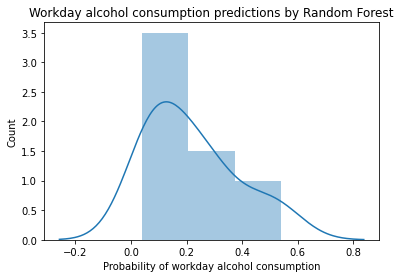

In [93]:
workday_alcohol_consumption_prob = y_pred_prob[:,1] 
sns.distplot(fraud_prob)
plt.xlabel("Probability of workday alcohol consumption")
plt.ylabel("Count")
plt.title("Workday alcohol consumption predictions by Random Forest")
plt.show()

## Y2: Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.3, random_state = 1)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

In [71]:
rf.score(X_test,y_test)

0.5833333333333334

### Evaluating the model

In [72]:
rf.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [75]:
y_pred = rf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
cm = pd.DataFrame(cm, index=['very low', 'low','medium','high','very high'], columns = ['very low', 'low','medium','high','very high'])
cm

,very low,low,medium,high,very high
very low,7,0,0,0,0
low,1,0,0,0,0
medium,0,1,0,0,0
high,1,0,0,0,0
very high,0,0,1,1,0


I am going to do the easy way to calculate some numbers by classificattion_report.

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.58        12
   macro avg       0.16      0.20      0.18        12
weighted avg       0.45      0.58      0.51        12



C:\Users\huhon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Different parameters

We can change the number of trees and the number of variables considered at each branch of the tree. By default, n_estimators is set to 10, and max_features is set to the square root of a numeric variable. Change the two completely by using a tree with all the variables, and then see what happens.

In [96]:
rf_new  = RandomForestClassifier(n_estimators = 10, max_features = 50, random_state=1)
rf_new = rf_new.fit(X_train, y_train)
y_pred_new = rf_new.predict(X_test) 
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.67        12
   macro avg       0.27      0.40      0.30        12
weighted avg       0.61      0.67      0.62        12



C:\Users\huhon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Making use of probabilities

In [97]:
y_pred_prob = rf.predict_proba(X_test) 
y_pred_prob

array([[0.83, 0.02, 0.09, 0.06, 0.  ],
       [0.28, 0.31, 0.27, 0.1 , 0.04],
       [0.63, 0.  , 0.13, 0.17, 0.07],
       [0.17, 0.31, 0.4 , 0.05, 0.07],
       [0.49, 0.17, 0.23, 0.05, 0.06],
       [0.46, 0.39, 0.11, 0.02, 0.02],
       [0.39, 0.08, 0.32, 0.13, 0.08],
       [0.72, 0.11, 0.14, 0.02, 0.01],
       [0.29, 0.13, 0.21, 0.32, 0.05],
       [0.77, 0.08, 0.1 , 0.04, 0.01],
       [0.76, 0.05, 0.08, 0.1 , 0.01],
       [0.71, 0.09, 0.07, 0.08, 0.05]])

This is a five-dimensional array with alcohol consumption probabilities of'very low','low','medium','high', and'very high'. Let's visualize the probability of seeing.

C:\Users\huhon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


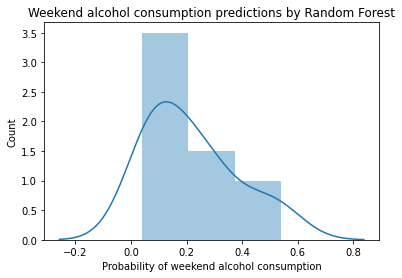

In [98]:
weekend_alcohol_consumption_prob = y_pred_prob[:,1] 
sns.distplot(fraud_prob)
plt.xlabel("Probability of weekend alcohol consumption")
plt.ylabel("Count")
plt.title("Weekend alcohol consumption predictions by Random Forest")
plt.show()